<a href="https://colab.research.google.com/github/SunYutongAmber/SignatureWork/blob/main/Hedonic_Pricing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import ast
import numpy as np
import math
import time
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [2]:
df_cryp=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SunYutongAmber/main/data/tx_db.csv')
df_cryp.head()

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...


# Rarity Calculation

## Trait Rarity 

In [3]:
df_cryp['attributes']

0        ['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...
1        ['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...
2            ['Welding Goggles', 'Dark Hair', 'Cigarette']
3            ['Welding Goggles', 'Dark Hair', 'Cigarette']
4        ['Black Lipstick', 'Green Eye Shadow', 'Mohawk...
                               ...                        
17821                   ['Blonde Short', 'Classic Shades']
17822                  ['Frown', 'Do-rag', 'Small Shades']
17823        ['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']
17824            ['Messy Hair', 'Earring', 'Normal Beard']
17825    ['Pipe', 'Straight Hair Blonde', 'Purple Lipst...
Name: attributes, Length: 17826, dtype: object

In [4]:
list_of_all_attributes=df_cryp['attributes'].map(ast.literal_eval).sum()
#list_of_attributes

In [5]:
#get the polishe list for all the attributes
list_of_attributes_remove_the_repeats=list(set(df_cryp['attributes'].map(ast.literal_eval).sum()))
list_of_attributes_remove_the_repeats = [x for x in list_of_attributes_remove_the_repeats if x != '']
list_of_attributes_remove_the_repeats

['Earring',
 'Eye Mask',
 'Wild White Hair',
 'Front Beard',
 'Black Lipstick',
 'Small Shades',
 'Horned Rim Glasses',
 'Headband',
 'Dark Hair',
 'Vampire Hair',
 'Blonde Short',
 'Silver Chain',
 'Eye Patch',
 'Blue Eye Shadow',
 'Bandana',
 'Rosy Cheeks',
 'Luxurious Beard',
 'Mole',
 'Hoodie',
 'Pigtails',
 'Hot Lipstick',
 'Do-rag',
 'Mohawk',
 'Frown',
 'Muttonchops',
 'Cap Forward',
 'Clown Hair Green',
 'Medical Mask',
 'Cigarette',
 'Top Hat',
 'Peak Spike',
 'Messy Hair',
 'Gold Chain',
 'Wild Hair',
 'Welding Goggles',
 'Choker',
 'Shadow Beard',
 'Cowboy Hat',
 'Mohawk Dark',
 'Clown Nose',
 'Buck Teeth',
 'Purple Lipstick',
 'Cap',
 'Spots',
 'Half Shaved',
 'Fedora',
 'Straight Hair Dark',
 'Frumpy Hair',
 'Tassle Hat',
 'Blonde Bob',
 'Crazy Hair',
 'Clown Eyes Green',
 'Big Shades',
 'Front Beard Dark',
 'Vape',
 'Normal Beard',
 'Knitted Cap',
 'Chinstrap',
 'VR',
 'Pilot Helmet',
 'Beanie',
 'Orange Side',
 'Handlebars',
 'Pipe',
 'Nerd Glasses',
 'Pink With Hat',
 '

In [6]:
number_of_cryptopunks=len(df_cryp)
number_of_cryptopunks

17826

In [7]:
traits_number_count=[]
trait_rarity_score=[]
for x in list_of_attributes_remove_the_repeats:
  a=list_of_all_attributes.count(x)
  traits_number_count.append(a)
  trait_rarity_score.append(number_of_cryptopunks/a)
#traits_number_count
#trait_rarity_score

## Normalization of Trait Rarity score

In [8]:
normalization_trait_rarity_score=np.array(trait_rarity_score)/sum(trait_rarity_score)
sum(normalization_trait_rarity_score)

0.9999999999999998

In [9]:
df_traits = {'Traits':list_of_attributes_remove_the_repeats,
             'Number_Count': traits_number_count,
             'Traits_Rarity_Score': trait_rarity_score,
             'Normalized_Traits_Rarity_Score': normalization_trait_rarity_score}
df_traits=DataFrame(df_traits)
df_traits

,Traits,Number_Count,Traits_Rarity_Score,Normalized_Traits_Rarity_Score
0,Earring,4597,3.877746,0.000650
1,Eye Mask,573,31.109948,0.005218
2,Wild White Hair,143,124.657343,0.020909
3,Front Beard,654,27.256881,0.004572
4,Black Lipstick,1103,16.161378,0.002711
...,...,...,...,...
82,Purple Eye Shadow,477,37.371069,0.006268
83,Straight Hair Blonde,204,87.382353,0.014657
84,Red Mohawk,218,81.770642,0.013716
85,Regular Shades,981,18.171254,0.003048


# Cryptopunk Rarity Score

## Rarest Trait Score Model

In [10]:
rarity_score1=[]

for i in range(len(df_cryp)):
  length=len(df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '))
  #print(length)
  #average_rarity=[]
  list_index=[]
  for x in df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '):
    #print(x)
    if x in list(df_traits['Traits']):
      #print(x)
      #a=df_traits[df_traits.Traits==x].index.tolist()
      a=list(df_traits['Traits']).index(x)
      list_index.append(a)
      #average_rarity.append(b)
      #print(average_rarity)

  b=[df_traits['Normalized_Traits_Rarity_Score'][j] for j in list_index]
  #print(b)
  #average_rarity.append(b)
  c=min(b,default = 0)
  #print(c)
  rarity_score1.append(c)

len(rarity_score1) 

17826

In [11]:
df_cryp['Rarity_Score_1_rarest'] = rarity_score1
df_cryp

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url,Rarity_Score_1_rarest
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.001774
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.001774
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.002711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.002996
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.004199
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,0.003161
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650


## Average Trait Rarity Model

In [12]:
rarity_score2=[]

for i in range(len(df_cryp)):
  length=len(df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '))
  #print(length)
  #average_rarity=[]
  list_index=[]
  for x in df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '):
    #print(x)
    if x in list(df_traits['Traits']):
      #print(x)
      #a=df_traits[df_traits.Traits==x].index.tolist()
      a=list(df_traits['Traits']).index(x)
      list_index.append(a)
      #print(a)
      #print(list_index)
      #b=df_traits['Normalized_Traits_Rarity_Score'][a]
      #print(b)
      #average_rarity.append(b)
      #print(average_rarity)

  b=[df_traits['Normalized_Traits_Rarity_Score'][j] for j in list_index]
  #print(b)
  #average_rarity.append(b)
  c=sum(b)/length
  #print(len(c))
  rarity_score2.append(c)

len(rarity_score2) 

17826

In [13]:
df_cryp['Rarity_Score_2_Average'] = rarity_score2
df_cryp

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.003414
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.003414
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.001774,0.016428
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.001774,0.016428
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.002711,0.004189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.002996,0.010140
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.004199,0.004694
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,0.003161,0.003520
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.003070


## Statistical Rarity Model

In [14]:
rarity_score3=[]

for i in range(len(df_cryp)):
  length=len(df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '))
  #print(length)
  #average_rarity=[]
  list_index=[]
  for x in df_cryp['attributes'][i].replace("[","").replace("]","").replace("'","").split(', '):
    #print(x)
    if x in list(df_traits['Traits']):
      #print(x)
      #a=df_traits[df_traits.Traits==x].index.tolist()
      a=list(df_traits['Traits']).index(x)
      list_index.append(a)
      #average_rarity.append(b)
      #print(average_rarity)

  b=[df_traits['Normalized_Traits_Rarity_Score'][j] for j in list_index]
  #print(b)
  c=math.prod(b)
  #print(c)
  rarity_score3.append(c)

len(rarity_score3) 

17826

In [15]:
df_cryp['Rarity_Score_3_multiple'] = rarity_score3
df_cryp

,Unnamed: 0,date,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,attributes,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.003414,5.288632e-11
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,"['Front Beard', 'Earring', 'Do-rag', 'Clown Ey...",#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.003414,5.288632e-11
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.001774,0.016428,6.721997e-07
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,"['Welding Goggles', 'Dark Hair', 'Cigarette']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.001774,0.016428,6.721997e-07
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,"['Black Lipstick', 'Green Eye Shadow', 'Mohawk...",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.002711,0.004189,5.621584e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,"['Blonde Short', 'Classic Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.002996,0.010140,5.178017e-05
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,"['Frown', 'Do-rag', 'Small Shades']",#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.004199,0.004694,1.002454e-07
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,"['Clown Eyes Blue', 'Shadow Beard', 'Mohawk']",#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,0.003161,0.003520,4.297626e-08
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,"['Messy Hair', 'Earring', 'Normal Beard']",#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.003070,1.157591e-08


# Merge with Gas fee and ETH/USD data

## import data and pre-processing

In [16]:
df_gas=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SignatureWork/main/Data/GAS_ETH.csv')
df_gas.head()

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2022-11-1,0.00154,0.00163,0.00174,0.00152,33.95K,-5.52%
1,2022-10-31,0.00163,0.00144,0.00198,0.00144,100.09K,13.19%
2,2022-10-30,0.00144,0.00145,0.00148,0.00142,16.63K,-0.69%
3,2022-10-29,0.00145,0.00152,0.00153,0.00142,35.91K,-4.61%
4,2022-10-28,0.00152,0.00154,0.00161,0.00149,19.63K,-1.30%


In [17]:
df_gas_ETH = {'date':df_gas['日期'],
              'gas_eth_price':df_gas['收盘']}
df_gas_ETH=DataFrame(df_gas_ETH)
df_gas_ETH

,date,gas_eth_price
0,2022-11-1,0.001540
1,2022-10-31,0.001630
2,2022-10-30,0.001440
3,2022-10-29,0.001450
4,2022-10-28,0.001520
...,...,...
1750,2018-1-15,0.066711
1751,2018-1-14,0.058071
1752,2018-1-13,0.044472
1753,2018-1-12,0.042612


In [18]:
df_usd=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SignatureWork/main/Data/ETH_USD.csv')
df_usd.head()

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2022-11-1,"1,579.63","1,572.75","1,609.23","1,564.67",527.44K,0.43%
1,2022-10-31,"1,572.86","1,590.71","1,634.10","1,550.70",810.30K,-1.11%
2,2022-10-30,"1,590.45","1,619.92","1,638.41","1,577.24",476.15K,-1.80%
3,2022-10-29,"1,619.61","1,554.03","1,660.00","1,548.82",914.09K,4.20%
4,2022-10-28,"1,554.40","1,514.12","1,572.59","1,490.12",859.14K,2.66%


In [19]:
df_ETH_usd = {'date':df_usd['日期'],
              'eth_usd_price':df_usd['收盘']}
df_ETH_usd=DataFrame(df_ETH_usd)
df_ETH_usd

,date,eth_usd_price
0,2022-11-1,"1,579.63"
1,2022-10-31,"1,572.86"
2,2022-10-30,"1,590.45"
3,2022-10-29,"1,619.61"
4,2022-10-28,"1,554.40"
...,...,...
1739,2018-1-22,999.37
1740,2018-1-21,"1,022.74"
1741,2018-1-20,"1,178.29"
1742,2018-1-19,979.57


## change the date format 

In [20]:
new_date=[]
for i in range(len(df_cryp)):
  #转换成时间数组
  timeArray = time.strptime(df_cryp['date'][i], "%Y-%m-%d")
  #转换成时间戳
  timestamp = time.mktime(timeArray)
  new_date.append(timestamp)
len(new_date)

17826

In [21]:
df_cryp['timestamp']=new_date

In [22]:
new_date1=[]
for i in range(len(df_gas_ETH)):
  #转换成时间数组
  timeArray = time.strptime(df_gas_ETH['date'][i], "%Y-%m-%d")
  #转换成时间戳
  timestamp = time.mktime(timeArray)
  new_date1.append(timestamp)
len(new_date1)

1755

In [23]:
df_gas_ETH['timestamp']=new_date1

In [24]:
new_date2=[]
for i in range(len(df_ETH_usd)):
  #转换成时间数组
  timeArray = time.strptime(df_ETH_usd['date'][i], "%Y-%m-%d")
  #转换成时间戳
  timestamp = time.mktime(timeArray)
  new_date2.append(timestamp)
len(new_date2)

1744

In [25]:
df_ETH_usd['timestamp']=new_date2

## merge the three data

In [26]:
df_cryp=df_cryp.merge(df_gas_ETH,on = 'timestamp',how = 'left')#左连接，左侧DataFrame取全部，右侧DataFrame取部分

In [27]:
df_cryp=df_cryp.merge(df_ETH_usd,on = 'timestamp',how = 'left')#左连接，左侧DataFrame取全部，右侧DataFrame取部分

In [28]:
df_cryp

,Unnamed: 0,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,...,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price
0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,4,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.003414,5.288632e-11,1.498176e+09,NaN,NaN,NaN,NaN
1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,4,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.003414,5.288632e-11,1.499040e+09,NaN,NaN,NaN,NaN
2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,3,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.001774,0.016428,6.721997e-07,1.498176e+09,NaN,NaN,NaN,NaN
3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,3,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.001774,0.016428,6.721997e-07,1.553040e+09,2019-3-20,0.02010,2019-3-20,139.02
4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,3,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.002711,0.004189,5.621584e-08,1.498176e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,2,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.002996,0.010140,5.178017e-05,1.658016e+09,2022-7-17,0.00200,2022-7-17,"1,337.84"
17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,3,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,0.004199,0.004694,1.002454e-07,1.658016e+09,2022-7-17,0.00200,2022-7-17,"1,337.84"
17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,3,...,#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,0.003161,0.003520,4.297626e-08,1.658102e+09,2022-7-18,0.00179,2022-7-18,"1,584.77"
17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,3,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.003070,1.157591e-08,1.658362e+09,2022-7-21,0.00177,2022-7-21,"1,575.74"


# Regression Model for Rarity Score (Explaination)

## Regression for Rarest Score Model

Estimated coefficients:
b_0 = 37.08617358058931  
b_1 = 1436.0784327833662


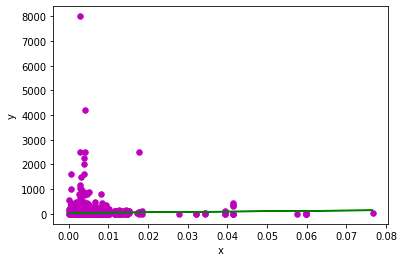

In [29]:
# -*- coding: utf-8 -*-
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    y = np.array(df_cryp['eth_price']) 
    x = np.array(df_cryp['Rarity_Score_1_rarest']) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

In [30]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp['Rarity_Score_1_rarest']) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.91
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.71e-06
Time:                        02:44:28   Log-Likelihood:            -1.0652e+05
No. Observations:               17826   AIC:                         2.130e+05
Df Residuals:                   17824   BIC:                         2.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.0862      1.085     34.192      0.0

## Regression for Average Rarity Model

https://blog.csdn.net/seagal890/article/details/105125566


Estimated coefficients:
b_0 = 31.37015032328848  
b_1 = 1775.4595095321647


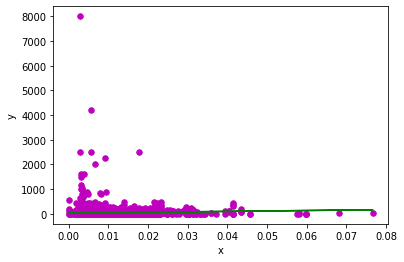

In [31]:
# -*- coding: utf-8 -*-
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    y = np.array(df_cryp['eth_price']) 
    x = np.array(df_cryp['Rarity_Score_2_Average']) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

linear regression: 
https://stackoverflow.com/questions/43608932/python-3-nameerror-name-sklearn-is-not-defined


error term:
https://blog.csdn.net/qq_45669448/article/details/105369454

In [32]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp['Rarity_Score_2_Average']) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     91.99
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           9.83e-22
Time:                        02:44:28   Log-Likelihood:            -1.0648e+05
No. Observations:               17826   AIC:                         2.130e+05
Df Residuals:                   17824   BIC:                         2.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3702      1.231     25.491      0.0

## Regression for Statistical Model

Estimated coefficients:
b_0 = 40.93520350279311  
b_1 = 150.47501878390443


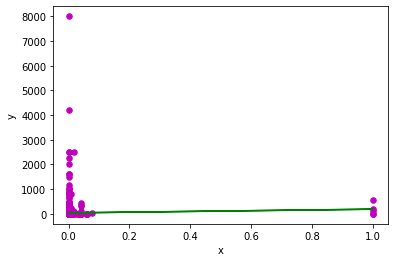

In [33]:
# -*- coding: utf-8 -*-
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    y = np.array(df_cryp['eth_price']) 
    x = np.array(df_cryp['Rarity_Score_3_multiple']) 
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

In [34]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp['Rarity_Score_3_multiple']) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.60
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           0.000388
Time:                        02:44:28   Log-Likelihood:            -1.0652e+05
No. Observations:               17826   AIC:                         2.130e+05
Df Residuals:                   17824   BIC:                         2.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.9352      0.714     57.345      0.0

# Hedonic Pricing Model for Rarity, Gas Fee and ETH/USD (Prediction) 

multiple regression: https://blog.csdn.net/HHTNAN/article/details/78843722


## sort the data with timestamp and then split training and testing set

In [117]:
df_cryp['eth_usd_price']=df_cryp['eth_usd_price'].apply(lambda x: float(x.replace(',',''))) 

In [119]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp

,Unnamed: 0,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,...,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price
2458,2458,2018-01-18,2794,15,0.15,5289,Human,Male,Dark,2,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.005255,0.007529,5.151433e-05,1.516234e+09,2018-1-18,0.056103,2018-1-18,991.01
2459,2459,2018-01-18,809,920,0.09,8994,Human,Female,Dark,3,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.001774,0.021091,4.078546e-07,1.516234e+09,2018-1-18,0.056103,2018-1-18,991.01
2462,2462,2018-01-18,1303,2450,0.09,4679,Human,Male,Albino,2,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.004199,0.005260,2.654600e-05,1.516234e+09,2018-1-18,0.056103,2018-1-18,991.01
319,319,2018-01-18,1303,2030,0.25,9863,Human,Male,Dark,1,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.001774,0.001774,1.774476e-03,1.516234e+09,2018-1-18,0.056103,2018-1-18,991.01
2495,2495,2018-01-19,1303,4866,0.10,4961,Human,Female,Dark,3,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.004267,2.365283e-08,1.516320e+09,2018-1-19,0.052589,2018-1-19,979.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12450,12450,2022-07-26,980,1939,94.00,9099,Human,Male,Light,4,...,#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.002977,2.595720e-11,1.658794e+09,2022-7-26,0.001820,2022-7-26,1450.91
17440,17440,2022-07-26,5318,4950,69.00,4430,Human,Female,Albino,2,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.003581,0.003908,1.516523e-05,1.658794e+09,2022-7-26,0.001820,2022-7-26,1450.91
17613,17613,2022-07-26,3002,1044,94.90,5600,Human,Male,Albino,3,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.003581,0.007455,2.193259e-07,1.658794e+09,2022-7-26,0.001820,2022-7-26,1450.91
13214,13214,2022-07-27,3096,1028,69.69,6221,Human,Female,Dark,4,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.000650,0.006142,1.205332e-10,1.658880e+09,2022-7-27,0.001720,2022-7-27,1635.98


Time Series data train and test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html


In [120]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [121]:
# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [122]:
for train_idx, test_idx in tss.split(df_cryp):
    print("TRAIN:", train_idx, "TEST:", test_idx)

TRAIN: [   0    1    2 ... 5591 5592 5593] TEST: [ 5594  5595  5596 ... 11184 11185 11186]
TRAIN: [    0     1     2 ... 11184 11185 11186] TEST: [11187 11188 11189 ... 16777 16778 16779]


In [123]:
train_df = df_cryp.filter(items=train_idx, axis=0)
test_df =  df_cryp.filter(items=test_idx, axis=0)    

In [124]:
train_df.head()
test_df.head()

,Unnamed: 0,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,attr_count,...,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price
11187,11187,2021-02-17,2055,3848,15.4,6751,Human,Male,Albino,2,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.005218,0.005279,0.000028,1.613520e+09,2021-2-17,0.00215,2021-2-17,1847.48
11188,11188,2021-08-27,5756,3096,135.0,6751,Human,Male,Albino,2,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.005218,0.005279,0.000028,1.630022e+09,2021-8-27,0.00319,2021-8-27,3273.57
11189,11189,2021-10-07,2642,3302,160.0,6751,Human,Male,Albino,2,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,0.005218,0.005279,0.000028,1.633565e+09,2021-10-7,0.00257,2021-10-7,3586.93
11190,11190,2021-02-17,2292,1727,9.5,8644,Human,Male,Dark,2,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.003560,0.003778,0.000014,1.613520e+09,2021-2-17,0.00215,2021-2-17,1847.48
11191,11191,2021-02-21,1727,5555,15.7,8644,Human,Male,Dark,2,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,0.003560,0.003778,0.000014,1.613866e+09,2021-2-21,0.00502,2021-2-21,1933.78


## define X_train, X_test, y_train, and y_test

In [125]:
cols_R = ['eth_price','Rarity_Score_1_rarest','Rarity_Score_2_Average','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']
cols_R

['eth_price',
 'Rarity_Score_1_rarest',
 'Rarity_Score_2_Average',
 'Rarity_Score_3_multiple',
 'gas_eth_price',
 'eth_usd_price']

In [126]:
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,eth_price,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price
11187,15.4,0.005218,0.005279,0.000028,0.00215,1847.48
11188,135.0,0.005218,0.005279,0.000028,0.00319,3273.57
11189,160.0,0.005218,0.005279,0.000028,0.00257,3586.93
11190,9.5,0.003560,0.003778,0.000014,0.00215,1847.48
11191,15.7,0.003560,0.003778,0.000014,0.00502,1933.78


In [127]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Hedonic regression with Rarity Score 1

In [ ]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

In [133]:
def mul_lr():   
    #剔除日期数据，一般没有这列可不执行，选取以下数据http://blog.csdn.net/chixujohnny/article/details/51095817
    X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
    y_train = pd.DataFrame(df_R_train['eth_price'])
    X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price'])
    y_test = pd.DataFrame(df_R_test['eth_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    # 训练后模型截距
    print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
    print (linreg.coef_)
mul_lr()

X_train.shape=(10143, 3)
 y_train.shape =(10143, 1)
 X_test.shape=(5591, 3)
,  y_test.shape=(5591, 1)
LinearRegression()
[-9.6652749]
[[ 1.81459216e+03 -1.96802986e+02  2.33531284e-02]]


RMSE by hand: [77.36739164]


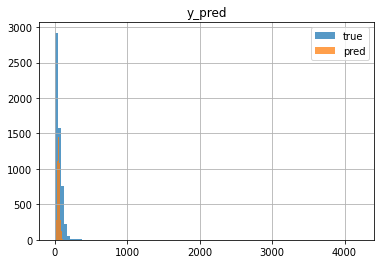

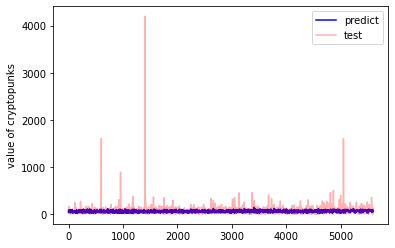

In [169]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)
#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=0.3)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

In [141]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp[['Rarity_Score_1_rarest','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     549.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        04:22:34   Log-Likelihood:                -99903.
No. Observations:               16780   AIC:                         1.998e+05
Df Residuals:                   16776   BIC:                         1.998e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7963      2.128     -3.194      0.0

## Hedonic regression with Rarity Score 2

In [170]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_2_Average','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

RMSE by hand: [76.67050414]


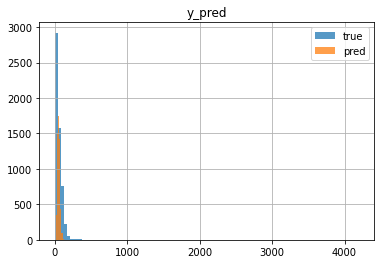

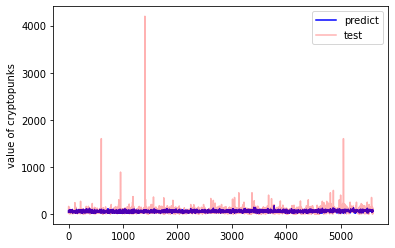

In [171]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=0.3)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

In [143]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp[['Rarity_Score_2_Average','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     588.3
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        04:29:10   Log-Likelihood:                -99850.
No. Observations:               16780   AIC:                         1.997e+05
Df Residuals:                   16776   BIC:                         1.997e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.3580      2.180     -6.127      0.0

## Hedonic regression with Rarity Score 3

In [172]:
X_train = pd.DataFrame(df_R_train,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['eth_price'])
X_test = pd.DataFrame(df_R_test,columns=['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['eth_price'])

RMSE by hand: [77.44422644]


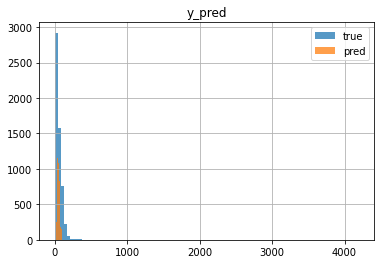

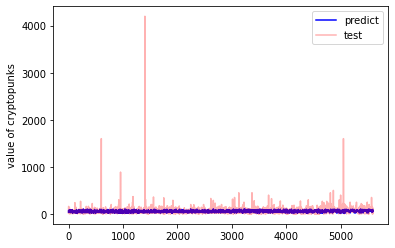

In [173]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=0.3)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

In [144]:
y = np.array(df_cryp['eth_price']) 
X = np.array(df_cryp[['Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     539.3
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        04:29:49   Log-Likelihood:                -99917.
No. Observations:               16780   AIC:                         1.998e+05
Df Residuals:                   16776   BIC:                         1.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1125      1.910     -0.059      0.9